In [16]:
import numpy as np
import pandas as pd
import re

In [17]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [18]:
import pandas as pd

df = pd.read_csv("../../Dataset/gurgaon_properties_cleaned_v1.csv")


In [19]:
df.duplicated().sum()

np.int64(122)

In [20]:
df.head(1)
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features 

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,the center court,sector 88a,2.1,12173.0,1725.0,Super Built up area 2175(202.06 sq.m.)Built Up area: 1745 sq.ft. (162.12 sq.m.)Carpet area: 1725 sq.ft. (160.26 sq.m.),4.0,4.0,3,"study room,servant room",0.0,East,Within 6 months,"['Elan Miracle Mall', 'Dwarka Expy, Harsaru', 'Saraswati Model School', 'Cambridge College Of Education', 'Arc Multi Speciality hospital', 'Indira Gandhi Intl Airport']",NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"


## 1. areaWithType

In [21]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
936,2.00,1380.0,Carpet area: 1380 (128.21 sq.m.)
2895,3.00,2610.0,Built Up area: 2610 (242.48 sq.m.)
3345,1.90,2727.0,Super Built up area 2727(253.35 sq.m.)Carpet area: 2300 sq.ft. (213.68 sq.m.)
910,3.50,160.0,Built Up area: 160 (14.86 sq.m.)
1685,0.95,1950.0,Super Built up area 1950(181.16 sq.m.)


In [22]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [23]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [24]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [25]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

TypeError: expected string or bytes-like object, got 'float'

In [26]:
import re

# This function extracts the Super Built up area, handles non-string input
def get_super_built_up_area(text):
    if not isinstance(text, str):
        return None
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

# This function extracts the Built Up area or Carpet area, handles non-string input
def get_area(text, area_type):
    if not isinstance(text, str):
        return None
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

# This function checks if the area is provided in sq.m. and converts it to sqft if needed, handles non-string input
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    if not isinstance(text, str):
        return area_value
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)


In [27]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
1051,2.50,flat,2244.0,Built Up area: 2244 (208.47 sq.m.)Carpet area: 1800 sq.ft. (167.23 sq.m.),NaN,2244.0,1800.0
1422,0.27,house,225.0,Plot area 225(20.9 sq.m.),NaN,NaN,NaN
1643,1.60,flat,1950.0,Super Built up area 1950(181.16 sq.m.)Carpet area: 1161 sq.ft. (107.86 sq.m.),1950.0,NaN,1161.0
1236,2.78,flat,2450.0,Super Built up area 2690(249.91 sq.m.)Built Up area: 2599 sq.ft. (241.46 sq.m.)Carpet area: 2450 sq.ft. (227.61 sq.m.),2690.0,2599.0,2450.0
794,3.95,flat,2343.0,Super Built up area 2343(217.67 sq.m.)Carpet area: 1512 sq.ft. (140.47 sq.m.),2343.0,NaN,1512.0


In [28]:
df.duplicated().sum()

np.int64(122)

In [30]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [32]:
df[df['areaWithType'].str.contains('Plot', na=False)][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)


,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
9,2.35,house,1440.0,Plot area 160(133.78 sq.m.),NaN,NaN,NaN
10,0.67,house,783.0,Plot area 87(72.74 sq.m.),NaN,NaN,NaN
25,0.90,house,785.0,Plot area 785(72.93 sq.m.),NaN,NaN,NaN
32,4.25,house,1350.0,Plot area 150(125.42 sq.m.),NaN,NaN,NaN
35,6.50,house,5400.0,Plot area 5400(501.68 sq.m.),NaN,NaN,NaN


In [29]:
df.isnull().sum()

property_type             1
society                   2
sector                    0
price                    19
price_per_sqft           19
area                     19
areaWithType              1
bedRoom                   1
bathroom                  1
balcony                   1
additionalRoom            1
floorNum                 20
facing                 1106
agePossession             2
nearbyLocations         178
furnishDetails          982
features                636
super_built_up_area    1889
built_up_area          2617
carpet_area            1860
dtype: int64

In [33]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [38]:
all_nan_df.shape

(547, 7)

In [34]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
9,2.35,house,1440.0,Plot area 160(133.78 sq.m.),NaN,NaN,NaN
10,0.67,house,783.0,Plot area 87(72.74 sq.m.),NaN,NaN,NaN
25,0.90,house,785.0,Plot area 785(72.93 sq.m.),NaN,NaN,NaN
32,4.25,house,1350.0,Plot area 150(125.42 sq.m.),NaN,NaN,NaN
35,6.50,house,5400.0,Plot area 5400(501.68 sq.m.),NaN,NaN,NaN


In [35]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [39]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [40]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

TypeError: expected string or bytes-like object, got 'float'

In [41]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
9,2.35,house,1440.0,Plot area 160(133.78 sq.m.),NaN,NaN,NaN
10,0.67,house,783.0,Plot area 87(72.74 sq.m.),NaN,NaN,NaN
25,0.90,house,785.0,Plot area 785(72.93 sq.m.),NaN,NaN,NaN
32,4.25,house,1350.0,Plot area 150(125.42 sq.m.),NaN,NaN,NaN
35,6.50,house,5400.0,Plot area 5400(501.68 sq.m.),NaN,NaN,NaN
37,7.25,house,2471.0,Plot area 303(253.35 sq.m.),NaN,NaN,NaN
40,3.40,house,2628.0,Plot area 292(244.15 sq.m.),NaN,NaN,NaN
45,2.98,house,1449.0,Plot area 161(134.62 sq.m.),NaN,NaN,NaN
59,5.00,house,2340.0,Plot area 260(217.39 sq.m.),NaN,NaN,NaN
74,6.50,house,2367.0,Plot area 263(219.9 sq.m.),NaN,NaN,NaN


In [42]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [43]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [44]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
9,2.35,house,1440.0,Plot area 160(133.78 sq.m.),NaN,NaN,NaN
10,0.67,house,783.0,Plot area 87(72.74 sq.m.),NaN,NaN,NaN
25,0.90,house,785.0,Plot area 785(72.93 sq.m.),NaN,NaN,NaN
32,4.25,house,1350.0,Plot area 150(125.42 sq.m.),NaN,NaN,NaN
35,6.50,house,5400.0,Plot area 5400(501.68 sq.m.),NaN,NaN,NaN
37,7.25,house,2471.0,Plot area 303(253.35 sq.m.),NaN,NaN,NaN
40,3.40,house,2628.0,Plot area 292(244.15 sq.m.),NaN,NaN,NaN
45,2.98,house,1449.0,Plot area 161(134.62 sq.m.),NaN,NaN,NaN
59,5.00,house,2340.0,Plot area 260(217.39 sq.m.),NaN,NaN,NaN
74,6.50,house,2367.0,Plot area 263(219.9 sq.m.),NaN,NaN,NaN


In [45]:
# update the original dataframe
df.update(all_nan_df)

In [46]:
df.isnull().sum()

property_type             1
society                   2
sector                    0
price                    19
price_per_sqft           19
area                     19
areaWithType              1
bedRoom                   1
bathroom                  1
balcony                   1
additionalRoom            1
floorNum                 20
facing                 1106
agePossession             2
nearbyLocations         178
furnishDetails          982
features                636
super_built_up_area    1889
built_up_area          2617
carpet_area            1860
dtype: int64

In [47]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,the center court,sector 88a,2.10,12173.0,1725.0,Super Built up area 2175(202.06 sq.m.)Built Up area: 1745 sq.ft. (162.12 sq.m.)Carpet area: 1725 sq.ft. (160.26 sq.m.),4.0,4.0,3,"study room,servant room",0.0,East,Within 6 months,"['Elan Miracle Mall', 'Dwarka Expy, Harsaru', 'Saraswati Model School', 'Cambridge College Of Education', 'Arc Multi Speciality hospital', 'Indira Gandhi Intl Airport']",NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",2175.0,1745.0,1725.0
1,flat,smart world gems,sector 89,1.20,12526.0,958.0,Carpet area: 958 (89 sq.m.),3.0,3.0,3,"pooja room,store room",3.0,East,Oct 2023,"['Sant Soordas Sihi Metro Station', 'Airia Mall', 'Dwarka Expressway', 'Pataudi Road', 'NH-8', 'KMP Expressway', 'RPS International School', 'Genesis Hospital Sector 84', 'Gurgaon Railway Station', 'Vatika Business Park Sector 49', 'Holiday Inn Gurugram Sector 90', 'De Adventure Amusement Park', 'National Tennis Academy Sector 98', 'IMT Manesar']","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",NaN,NaN,958.0
2,flat,godrej icon,sector 88a,1.65,9041.0,1825.0,Super Built up area 1825(169.55 sq.m.),3.0,3.0,3,not available,12.0,NaN,0 to 1 Year Old,"['JMS Crosswalk', ""Saint Paul's School"", 'Indus valley Public School', 'MDS Public School', 'Gurugram University', 'Axis Bank ATM', 'Genesis Hospital', 'Shri Balaji’s Multispeciality Hospital', 'Signature Super Speciality Hospital', 'Health care pharmacy', 'Jadon Pharmacy', 'Harsaru Village Bus Stop', 'Garhi Harsaru Junction', 'Hyatt Regency Gurgaon', 'Essar Petrol Pump']",NaN,"['Security / Fire Alarm', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Water Storage', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']",1825.0,NaN,NaN
3,flat,sapphire eighty three,sector 83,0.65,9286.0,700.0,Built Up area: 700 (65.03 sq.m.),1.0,1.0,0,not available,6.0,NaN,undefined,"['S.R.S. Hospital and Critical Care Unit', 'Orris Community Center', 'Petrol Pump Indian Oil', 'Petrol Pump Indian Oil', 'Petrol Pump', 'Essar Petrol Pump', 'Haldiram', 'KFC', 'Rao Dhaba', 'Pizza Hut', ""McDonald's""]","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,700.0,NaN
4,flat,park view apartments,sector 15,1.60,11034.0,1450.0,Carpet area: 1450 (134.71 sq.m.),3.0,3.0,3+,pooja room,2.0,North-West,5 to 10 Year Old,"['Hanuman Mandi

## 2.additionalRoom

In [48]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
study room,servant room                            99
store room                                         99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
servant room,

In [50]:
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

for col in new_cols:
    df[col] = df['additionalRoom'].fillna('').str.contains(col, case=False).astype(int)


In [51]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
1652,"study room,servant room",1,1,0,0,0
3554,"study room,servant room,pooja room",1,1,0,1,0
2377,"pooja room,study room",1,0,0,1,0
513,"servant room,pooja room",0,1,0,1,0
2740,not available,0,0,0,0,0


In [52]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,the center court,sector 88a,2.10,12173.0,1725.0,Super Built up area 2175(202.06 sq.m.)Built Up area: 1745 sq.ft. (162.12 sq.m.)Carpet area: 1725 sq.ft. (160.26 sq.m.),4.0,4.0,3,"study room,servant room",0.0,East,Within 6 months,"['Elan Miracle Mall', 'Dwarka Expy, Harsaru', 'Saraswati Model School', 'Cambridge College Of Education', 'Arc Multi Speciality hospital', 'Indira Gandhi Intl Airport']",NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",2175.0,1745.0,1725.0,1,1,0,0,0
1,flat,smart world gems,sector 89,1.20,12526.0,958.0,Carpet area: 958 (89 sq.m.),3.0,3.0,3,"pooja room,store room",3.0,East,Oct 2023,"['Sant Soordas Sihi Metro Station', 'Airia Mall', 'Dwarka Expressway', 'Pataudi Road', 'NH-8', 'KMP Expressway', 'RPS International School', 'Genesis Hospital Sector 84', 'Gurgaon Railway Station', 'Vatika Business Park Sector 49', 'Holiday Inn Gurugram Sector 90', 'De Adventure Amusement Park', 'National Tennis Academy Sector 98', 'IMT Manesar']","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",NaN,NaN,958.0,0,0,1,1,0
2,flat,godrej icon,sector 88a,1.65,9041.0,1825.0,Super Built up area 1825(169.55 sq.m.),3.0,3.0,3,not available,12.0,NaN,0 to 1 Year Old,"['JMS Crosswalk', ""Saint Paul's School"", 'Indus valley Public School', 'MDS Public School', 'Gurugram University', 'Axis Bank ATM', 'Genesis Hospital', 'Shri Balaji’s Multispeciality Hospital', 'Signature Super Speciality Hospital', 'Health care pharmacy', 'Jadon Pharmacy', 'Harsaru Village Bus Stop', 'Garhi Harsaru Junction', 'Hyatt Regency Gurgaon', 'Essar Petrol Pump']",NaN,"['Security / Fire Alarm', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Water Storage', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']",1825.0,NaN,NaN,0,0,0,0,0
3,flat,sapphire eighty three,sector 83,0.65,9286.0,700.0,Built Up area: 700 (65.03 sq.m.),1.0,1.0,0,not available,6.0,NaN,undefined,"['S.R.S. Hospital and Critical Care Unit', 'Orris Community Center', 'Petrol Pump Indian Oil', 'Petrol Pump Indian Oil', 'Petrol Pump', 'Essar Petrol Pump', 'Haldiram', 'KFC', 'Rao Dhaba', 'Pizza Hut', ""McDonald's""]","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,700.0,NaN,0,0,0,0,0
4,flat,park view apartments,sector 15,1.60,11034.0,1450.0,Carpet are

## 3.agePossession

In [53]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Oct 2024                 8
Jan 2024                 8
Jun 2024                 7
Aug 2023                 7
Dec 2025                 7
Nov 2023                 5
Oct 2023                 4
Aug 2024                 4
Jul 2024                 4
By 2025                  4
Sep 2023                 4
Feb 2024                 3
May 2024                 3
Jan 2025                 3
Nov 2024                 3
By 2027                  2
Aug 2025                 2
Apr 2026                 2
Sep 2025                 2
Jan 2026                 2
Mar 2025                 2
Dec 2026                 2
Jun 2027                 2
Jul 2027      

In [54]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [55]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [56]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              334
Old Property           310
Under Construction     283
Name: count, dtype: int64

In [57]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,the center court,sector 88a,2.10,12173.0,1725.0,Super Built up area 2175(202.06 sq.m.)Built Up area: 1745 sq.ft. (162.12 sq.m.)Carpet area: 1725 sq.ft. (160.26 sq.m.),4.0,4.0,3,"study room,servant room",0.0,East,New Property,"['Elan Miracle Mall', 'Dwarka Expy, Harsaru', 'Saraswati Model School', 'Cambridge College Of Education', 'Arc Multi Speciality hospital', 'Indira Gandhi Intl Airport']",NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",2175.0,1745.0,1725.0,1,1,0,0,0
1,flat,smart world gems,sector 89,1.20,12526.0,958.0,Carpet area: 958 (89 sq.m.),3.0,3.0,3,"pooja room,store room",3.0,East,Under Construction,"['Sant Soordas Sihi Metro Station', 'Airia Mall', 'Dwarka Expressway', 'Pataudi Road', 'NH-8', 'KMP Expressway', 'RPS International School', 'Genesis Hospital Sector 84', 'Gurgaon Railway Station', 'Vatika Business Park Sector 49', 'Holiday Inn Gurugram Sector 90', 'De Adventure Amusement Park', 'National Tennis Academy Sector 98', 'IMT Manesar']","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",NaN,NaN,958.0,0,0,1,1,0
2,flat,godrej icon,sector 88a,1.65,9041.0,1825.0,Super Built up area 1825(169.55 sq.m.),3.0,3.0,3,not available,12.0,NaN,New Property,"['JMS Crosswalk', ""Saint Paul's School"", 'Indus valley Public School', 'MDS Public School', 'Gurugram University', 'Axis Bank ATM', 'Genesis Hospital', 'Shri Balaji’s Multispeciality Hospital', 'Signature Super Speciality Hospital', 'Health care pharmacy', 'Jadon Pharmacy', 'Harsaru Village Bus Stop', 'Garhi Harsaru Junction', 'Hyatt Regency Gurgaon', 'Essar Petrol Pump']",NaN,"['Security / Fire Alarm', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Water Storage', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']",1825.0,NaN,NaN,0,0,0,0,0
3,flat,sapphire eighty three,sector 83,0.65,9286.0,700.0,Built Up area: 700 (65.03 sq.m.),1.0,1.0,0,not available,6.0,NaN,Undefined,"['S.R.S. Hospital and Critical Care Unit', 'Orris Community Center', 'Petrol Pump Indian Oil', 'Petrol Pump Indian Oil', 'Petrol Pump', 'Essar Petrol Pump', 'Haldiram', 'KFC', 'Rao Dhaba', 'Pizza Hut', ""McDonald's""]","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,700.0,NaN,0,0,0,0,0
4,flat,park view apartments,sector 15,1.60,11034.0,1450.0,Carpet

## 4.furnishDetails

In [605]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
1623,NaN,"['Security / Fire Alarm', 'Power Back-up', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Visitor Parking', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']"
2713,"['3 Fan', '1 Exhaust Fan', '3 Geyser', '7 Light', '1 Chimney', '2 Wardrobe', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",NaN
130,"['7 Wardrobe', '17 Light', '5 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Park', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']"
1419,NaN,"['Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Park', 'Visitor Parking', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors']"
2213,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN


In [58]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]


<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
C:\Users\91945\AppData\Local\Temp\ipykernel_11152\2118040236.py:13: SyntaxWarning: invalid escape sequence '\d'
  pattern = re.compile(f"(\d+) {furnishing}")


In [59]:
furnishings_df.shape

(3804, 19)

In [60]:
furnishings_df.head()

,furnishDetails,Stove,Washing Machine,Curtains,Dining Table,Fridge,AC,Geyser,Wardrobe,Microwave,Chimney,Sofa,Fan,Exhaust Fan,Modular Kitchen,Light,Bed,TV,Water Purifier
0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
2,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
4,"['6 Fan', '10 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0,0,0,0,0,0,0,0,0,0,0,6,0,0,10,0,0,0


In [61]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\91945\AppData\Local\Temp\ipykernel_11152\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [62]:
furnishings_df.sample(5)

,Stove,Washing Machine,Curtains,Dining Table,Fridge,AC,Geyser,Wardrobe,Microwave,Chimney,Sofa,Fan,Exhaust Fan,Modular Kitchen,Light,Bed,TV,Water Purifier
3004,0,0,0,0,0,0,3,3,0,1,0,7,1,1,12,0,0,1
2489,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
302,0,1,0,0,0,3,0,3,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,3,3,0,1,0,0,1,1,0,0,0,0
1659,0,0,0,0,0,3,0,1,0,0,0,0,0,1,0,0,0,0


In [63]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [64]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [65]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

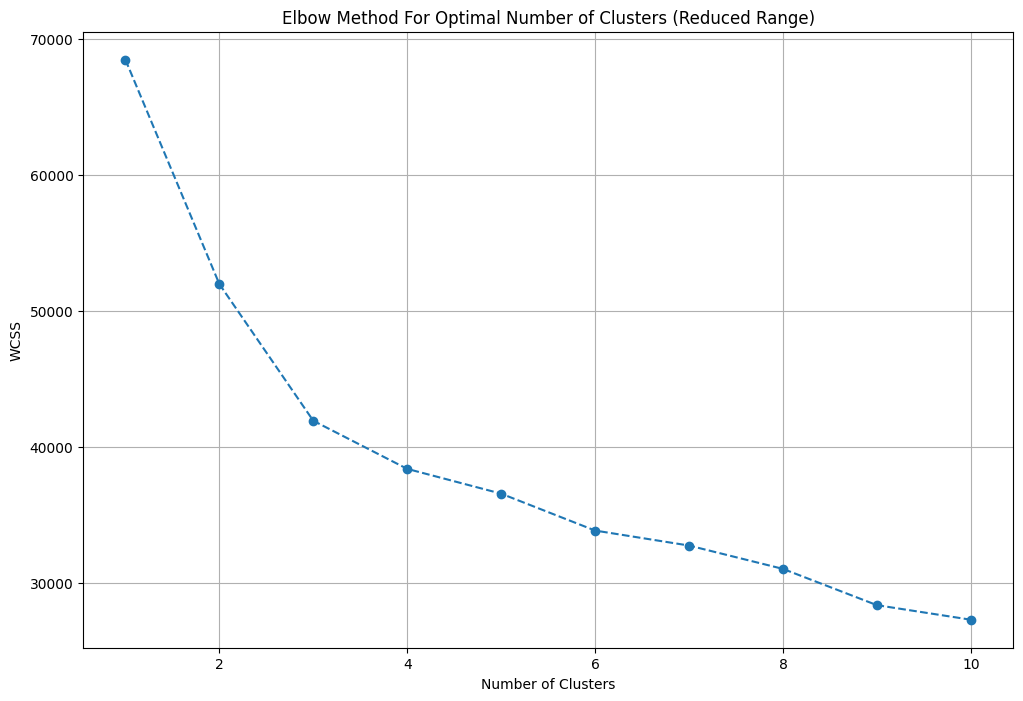

In [66]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [67]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [68]:
df = df.iloc[:,:-18]

In [69]:
df['furnishing_type'] = cluster_assignments

In [70]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
2066,"['4 Fan', '4 Light', '3 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0
818,[],0
1631,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0
2665,NaN,0
3270,"['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '2 Geyser', '8 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",2


## 5.features

In [71]:
df[['society','features']].sample(5)

,society,features
489,afnhb jalvayu vihar,"['Feng Shui / Vaastu Compliant', 'Maintenance Staff', 'Water Storage', 'Park', 'Piped-gas', 'Visitor Parking', 'Security Personnel', 'Club house / Community Center', 'Rain Water Harvesting']"
3052,paras dews,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
3316,independent,NaN
2643,independent,"['Maintenance Staff', 'Water Storage', 'Visitor Parking', 'Waste Disposal']"
276,eldeco accolade,"['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']"


In [72]:
df['features'].isnull().sum()

np.int64(636)

In [74]:
import pandas as pd
app_df = pd.read_csv('../../Dataset/appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [76]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [77]:
temp_df = df[df['features'].isnull()]

In [78]:
temp_df.shape

(636, 26)

In [79]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [80]:
df.loc[temp_df.index,'features'] = x.values

In [81]:
df['features'].isnull().sum()

np.int64(482)

In [82]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [83]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [84]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
2195,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1498,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3798,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
666,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1226,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [85]:
features_binary_df.shape

(3804, 130)

In [86]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

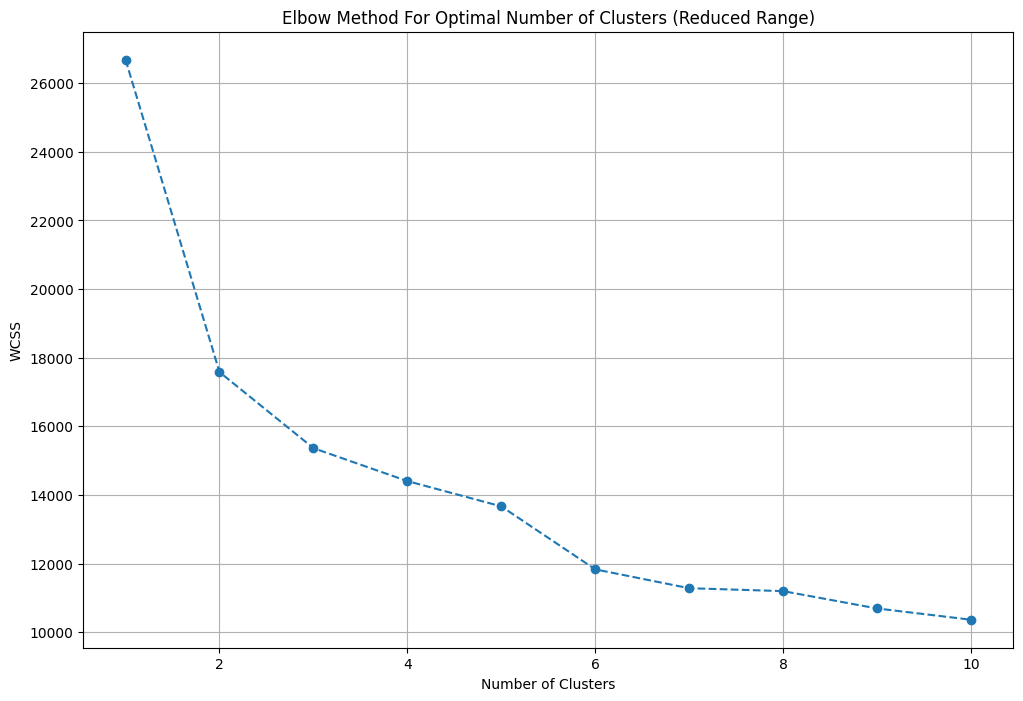

In [87]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [88]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


In [89]:
df['luxury_score'] = luxury_score

In [90]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,the center court,sector 88a,2.10,12173.0,1725.0,Super Built up area 2175(202.06 sq.m.)Built Up area: 1745 sq.ft. (162.12 sq.m.)Carpet area: 1725 sq.ft. (160.26 sq.m.),4.0,4.0,3,"study room,servant room",0.0,East,New Property,"['Elan Miracle Mall', 'Dwarka Expy, Harsaru', 'Saraswati Model School', 'Cambridge College Of Education', 'Arc Multi Speciality hospital', 'Indira Gandhi Intl Airport']",NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",2175.0,1745.0,1725.0,1,1,0,0,0,0,"[Security / Fire Alarm, Feng Shui / Vaastu Compliant, Intercom Facility, Lift(s), High Ceiling Height, Maintenance Staff, False Ceiling Lighting, Water Storage, Separate entry for servant room, No open drainage around, Bank Attached Property, Piped-gas, Internet/wi-fi connectivity, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Airy Rooms, Spacious Interiors, Low Density Society, Waste Disposal, Water softening plant, Shopping Centre, Fitness Centre / GYM, Club house / Community Center]",142
1,flat,smart world gems,sector 89,1.20,12526.0,958.0,Carpet area: 958 (89 sq.m.),3.0,3.0,3,"pooja room,store room",3.0,East,Under Construction,"['Sant Soordas Sihi Metro Station', 'Airia Mall', 'Dwarka Expressway', 'Pataudi Road', 'NH-8', 'KMP Expressway', 'RPS International School', 'Genesis Hospital Sector 84', 'Gurgaon Railway Station', 'Vatika Business Park Sector 49', 'Holiday Inn Gurugram Sector 90', 'De Adventure Amusement Park', 'National Tennis Academy Sector 98', 'IMT Manesar']","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",NaN,NaN,958.0,0,0,1,1,0,0,"[Security / Fire Alarm, Private Garden / Terrace, Intercom Facility, Lift(s), Maintenance Staff, Water Storage, No open drainage around, Piped-gas, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Internet/wi-fi connectivity, Airy Rooms, Spacious Interiors, Low Density Society, Shopping Centre, Fitness Centre / GYM, Waste Disposal, Rain Water Harvesting, Club house / Community Center, Water softening plant]",131
2,flat,godrej icon,sector 88a,1.65,9041.0,1825.0,Super Built up area 1825(169.55 sq.m.),3.0,3.0,3,not available,12.0,NaN,New Property,"['JMS Crosswalk', ""Saint Paul's School"", 'Indus valley Public School', 'MDS Public School', 'Gurugram University', 'Axis Bank ATM', 'Genesis Hospital', 'Shri Balaji’s Multispeciality Hospital', 'Signature Super Speciality Hospital', 'Health care pharmacy', 'Jadon Pharmacy', 'Harsaru Village Bus Stop'

In [91]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [92]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
683,flat,unitech uniworld gardens,sector 47,2.40,11505.0,2086.0,Super Built up area 2086(193.8 sq.m.)Carpet area: 1750 sq.ft. (162.58 sq.m.),3.0,4.0,3+,10.0,East,Moderately Old,2086.0,NaN,1750.0,0,1,0,0,0,0,103
3429,house,vatika india next,sector 83,1.70,7870.0,2160.0,Plot area 240(200.67 sq.m.),3.0,3.0,3+,4.0,North-West,New Property,NaN,NaN,NaN,0,1,0,1,0,0,0
2953,flat,vipul lavanya,sector 81,0.64,5261.0,1216.0,Carpet area: 1225 (113.81 sq.m.),2.0,2.0,3,12.0,East,Relatively New,NaN,NaN,1225.0,0,0,0,0,0,2,93
1778,flat,ss the leaf,sector 85,1.10,6318.0,1741.0,Super Built up area 1741(161.74 sq.m.)Carpet area: 1218 sq.ft. (113.16 sq.m.),2.0,2.0,3+,3.0,South-East,Relatively New,1741.0,NaN,1218.0,0,0,1,0,0,0,143
3779,flat,sare green parc phase 3,sector 92,0.75,7142.0,1050.0,Super Built up area 1326(123.19 sq.m.)Built Up area: 1298 sq.ft. (120.59 sq.m.)Carpet area: 1050 sq.ft. (97.55 sq.m.),3.0,2.0,2,3.0,East,New Property,1326.0,1298.0,1050.0,0,0,0,0,0,0,121


In [93]:
df.shape

(3804, 23)

In [94]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)